# Pesquisa de Desenvolvimento no setor de Reciclagem em Singapura

# Por que analisar dados de Singapura?

Quando falamos em planejamento sustentável, Singapura, está entre as 10 cidades mais sustentáveis do mundo, aparece como um ótimo exemplo a ser seguido por outros países. O governo do país asiático deu grande ênfase na questão da sustentabilidade. Assim, os resultados são notáveis.

Singapura vem continuamente construindo sua reputação como uma cidade na natureza, e seu design há muito tempo mostra uma forte consciência de reconhecer que os espaços verdes são importantes. Planejadores urbanos e arquitetos tomaram a decisão consciente de tecer a natureza por toda a cidade, à medida que continuam desenraizando novos edifícios e empreendimentos, incorporando a vida vegetal em qualquer forma, seja através de telhados verdes, jardins verticais escalonados ou paredes com plantas.

## Processo de Extração - Tratamento e Limpeza dos dados disponiveis no Kaggle


* Extração feita no drive após download da base de dados [Link](https://www.kaggle.com/datasets/kingabzpro/singapore-waste-management)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* bibliotecas utilizadas na linguagem python

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

In [ ]:
#!pip install matplotlib --upgrade

In [ ]:
#print(matplotlib.__version__)

* Limpeza e Tratamento dos dados fornecidos

In [ ]:
pd.set_option('display.max_columns', None) # Configurando a quantidade de colunas visiveis na função head()

singapure2017 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Singapure/2003_2017_waste.csv', sep=',', encoding='utf-8')
singapure2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Singapure/2018_2020_waste.csv', sep=',', encoding='utf-8')  

In [ ]:
traducao = {
    'waste_type': 'TipoDeResiduo',
    'waste_disposed_of_tonne': 'ToneladaDescartada',
    'total_waste_recycled_tonne': 'ToneladaReciclada',
    'total_waste_generated_tonne': 'ToneladaDeResiduos',
    'recycling_rate': 'TaxaDeReciclagem',
    'year': 'Ano'
}

singapure2017 = singapure2017.rename(columns=traducao)

In [ ]:
traducao = {
    'Waste Type': 'TipoDeResiduo',
    "Total Recycled ('000 tonnes)": 'ToneladaReciclada',
    "Total Generated ('000 tonnes)": 'ToneladaDeResiduos',
    'Year': 'Ano'
}

singapure2020 = singapure2020.rename(columns=traducao)

singapure2020['ToneladaDeResiduos'] = (singapure2020['ToneladaDeResiduos'] * 1000)
singapure2020['ToneladaReciclada'] = (singapure2020['ToneladaReciclada'] * 1000)

In [ ]:
singapure2020['TaxaDeReciclagem'] = round(singapure2020['ToneladaReciclada'] / singapure2020['ToneladaDeResiduos'], 2)

In [ ]:
converter = {'Plastics': 'Plastic', 'Non-ferrous Metals' : 'Non-ferrous Metal', 
             'Ferrous metal': 'Ferrous Metal', 'Ash and sludge': 'Ash & Sludge',
             'Others (stones, ceramics & rubber etc.)': 'Others (stones, ceramics & rubber etc)',
             'Others (stones, ceramic, rubber, etc.)' : 'Others (stones, ceramics & rubber etc)',
             'Wood/Timber' : 'Wood', 'Ferrous Metal': 'Ferrous Metals', 'Horticultural waste' : 'Horticultural Waste', 'Non-ferrous metal': 'Non-ferrous Metal', 
             'Used Slag': 'Used slag', 'Scrap tyres': 'Scrap Tyres', 'Construction debris': 'Construction Debris', 'Non-ferrous metals': 'Non-ferrous Metal',
             'Sludge': 'Ash & Sludge', 'Food waste' : 'Food', 'Others': 'Others (stones, ceramics & rubber etc)', 'Horticultural Waste': 'Food',
             'C&D': 'Construction Debris'}


singapure2017['TipoDeResiduo'] = singapure2017['TipoDeResiduo'].replace(converter)
#singapure2017['TipoDeResiduo'].unique()

In [ ]:
converter = {'Horticultural': 'Food', 'Ferrous Metal': 'Ferrous metal', 'Construction& Demolition': 'Construction & Demolition', 
             'Ash & sludge': 'Ash & Sludge', 'Used slag': 'Used Slag', 'Scrap tyres': 'Scrap Tyres', 'Non-ferrous metal': 'Non-Ferrous Metal',
             'Others (stones, ceramics, etc.)': 'Others (stones, ceramic, rubber, ect)', 'Overall': 'Total'}


singapure2020['TipoDeResiduo'] = singapure2020['TipoDeResiduo'].replace(converter)
singapure2020['ToneladaDescartada'] = (singapure2020['ToneladaDeResiduos'] - singapure2020['ToneladaReciclada'])

In [ ]:
len(singapure2020['TipoDeResiduo'].unique()), len(singapure2017['TipoDeResiduo'].unique())

(14, 16)

In [ ]:
singapure = pd.concat([singapure2020, singapure2017])

In [ ]:
# [ATENÇÃO] Repita o carregamento da celula 2x


converter = {'Construction Debris': 'Construction & Demolition', 'Ferrous metal': 'Ferrous Metals',
             'Others (stones, ceramics & rubber etc)': 'Others (stones, ceramic, rubber, ect)', 'Non-ferrous Metal': 'Non-Ferrous Metal',
             'Used slag': 'Used Slag', 'Non-ferrous Metal': 'Non-Ferrous Metal', 'Plastic': 'Plastics', 'Ferrous Metals': 'Ferrous Metal' }


singapure['TipoDeResiduo'] = singapure['TipoDeResiduo'].replace(converter)
singapure = singapure[['Ano', 'TipoDeResiduo', 'ToneladaDeResiduos', 'ToneladaReciclada', 'ToneladaDescartada', 'TaxaDeReciclagem']]
#len(singapure['TipoDeResiduo'].unique())

In [ ]:
traducao = {'Construction & Demolition': 'Construção/Demolição', 'Ferrous Metal': 'Metal Ferroso',
            'Paper/Cardboard': 'Papel/Cartão', 'Plastics': 'Plastico', 'Food': 'Comida', 'Wood': 'Madeira', 'Ash & Sludge': 'Cinzas e Lodo', 
            'Textile/Leather': 'Têxtil/Couro', 'Used Slag': 'Escória', 'Non-Ferrous Metal': 'Metal não ferroso', 'Glass': 'Vidro',
            'Scrap Tyres': 'Pneus', 'Others (stones, ceramic, rubber, ect)': 'Outros', 'Horticultural Waste': 'Resíduos Hortícolas'}


singapure['TipoDeResiduo'] = singapure['TipoDeResiduo'].replace(traducao)
singapure = singapure[['Ano', 'TipoDeResiduo', 'ToneladaDeResiduos', 'ToneladaReciclada', 'ToneladaDescartada', 'TaxaDeReciclagem']]
#len(singapure['TipoDeResiduo'].unique())

## Analise dos dados


### Visualizando a quantidade total de reciclagem por ano

In [ ]:
def value_graph1(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 1000, y[i], ha = 'right', va='bottom', color="white",
         fontsize= 12, bbox = dict(facecolor = 'red', alpha =.8))
        
def value2_graph1(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', va='bottom',
         fontsize= 12, bbox = dict(facecolor = 'green', alpha =.8))        

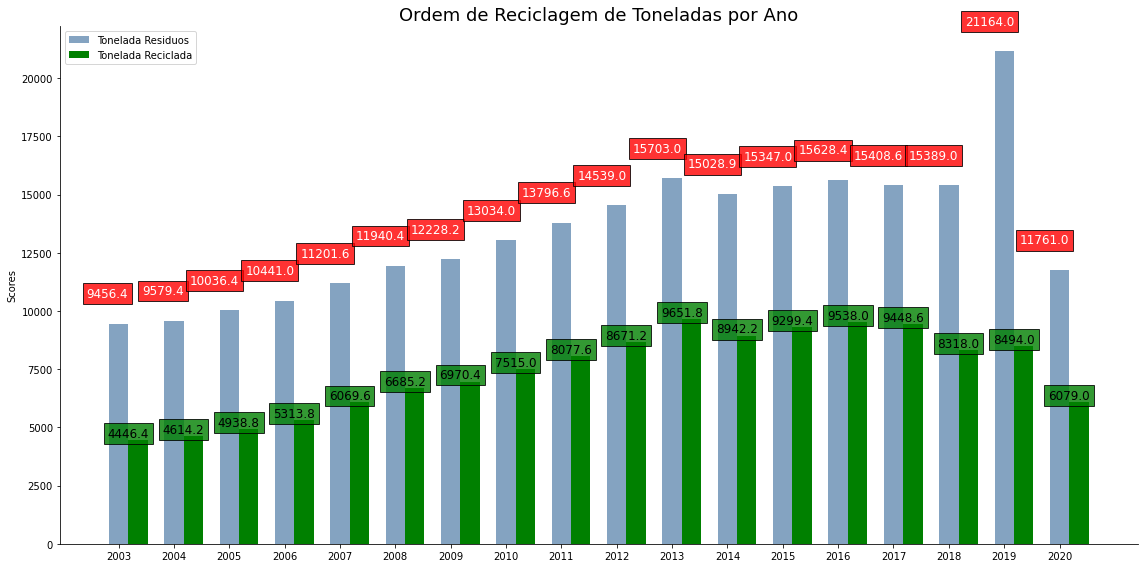

In [ ]:
# [DOCUMENTAÇÃO] VALUES =  https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/ 
# [DOCUMENTAÇÃO] SUBPLOTS =  https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

Reciclagem = singapure.groupby(['Ano'])[['ToneladaDeResiduos', 'ToneladaReciclada']].sum().reset_index()


labels = list(Reciclagem['Ano'].values)
ToneladaResiduos =  Reciclagem['ToneladaDeResiduos'] / 1000
ToneladaReciclada = Reciclagem['ToneladaReciclada'] / 1000

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(x - width/2, ToneladaResiduos, width, label='Tonelada Residuos', tick_label=labels, color=(0.2, 0.4, 0.6, 0.6))
ax.bar(x + width/2, ToneladaReciclada, width, label='Tonelada Reciclada', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Ordem de Reciclagem de Toneladas por Ano', fontsize = 18)
ax.legend()

# Removendo bordas
right = ax.spines["right"]
top = ax.spines["top"]
top.set_visible(False)
right.set_visible(False)

value_graph1(labels, ToneladaResiduos)
value2_graph1(labels, ToneladaReciclada)

fig.tight_layout()

plt.show()
fig.savefig('ReciclagemAno.jpg', dpi=fig.dpi)

Singapura consegue entregar um otimo serviço de reciclagem no geral, de modo que a soma total anual de toneladas de residuos consegue entregar alvos proximos ou a mais de 50% de reciclagem. 

Isso pode ser um reflexo do investimento do governo na contração de funcionarios para coleta de residuos junto a leis rigidas que fiscalizam turistas e nativos.

### Visualizando a quantidade total de reciclagem por material 

In [ ]:
def value_graph2(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 1000, y[i], ha = 'right', va='bottom', color="white",
                 fontsize= 12, bbox = dict(facecolor = 'red', alpha =.8))
        
def value2_graph2(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', va='bottom', 
         fontsize= 12, bbox = dict(facecolor = 'green', alpha =.8))

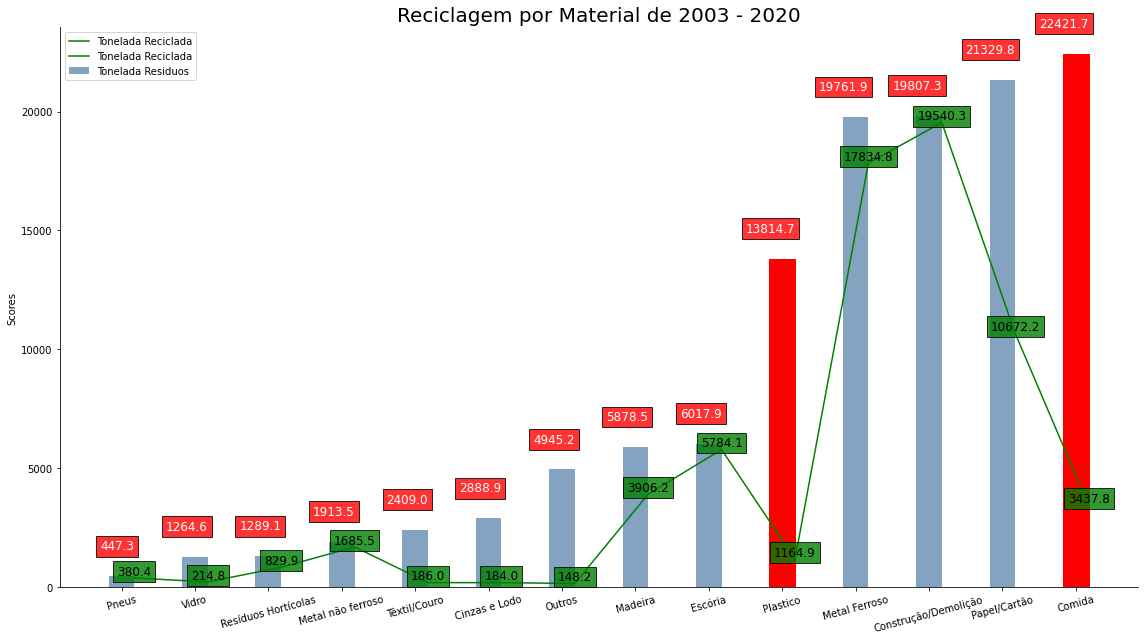

In [ ]:
Reciclagem =  singapure.groupby(['TipoDeResiduo'])[['ToneladaDeResiduos', 'ToneladaReciclada']].sum().reset_index()
Reciclagem =  Reciclagem[Reciclagem['TipoDeResiduo'] != 'Total'].sort_values(by='ToneladaDeResiduos', ascending=True).reset_index()


labels = list(Reciclagem['TipoDeResiduo'].values)
ToneladaResiduos =  Reciclagem['ToneladaDeResiduos'] / 1000
ToneladaReciclada = Reciclagem['ToneladaReciclada'] / 1000

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(16, 9))



graph1 = ax.bar(x - width/2, ToneladaResiduos, width, label='Tonelada Residuos', tick_label=labels, color=(0.2, 0.4, 0.6, 0.6))
graph1[9].set_color('r')
graph1[13].set_color('r')


graph2 = ax.plot(x, ToneladaReciclada, width, label='Tonelada Reciclada', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_xticklabels(labels, rotation = 15)
ax.set_title('Reciclagem por Material de 2003 - 2020', fontsize = 20)
ax.legend()



# Removendo bordas
right = ax.spines["right"]
top = ax.spines["top"]
top.set_visible(False)
right.set_visible(False)


value_graph2(labels, ToneladaResiduos)
value2_graph2(labels, ToneladaReciclada)

fig.tight_layout()

plt.show()
fig.savefig('ReciclagemMaterial.jpg', dpi=fig.dpi)

O tempo de desenvolvimento tecnologico no setor de reciclagem de 2003 a 2020 foi suficiente para aprimorar metodos a alcancarem volumes de reciclagem acima de 50%. 

Mas essa tarefa não foi cumprida em alguns tipos de residuo, e como exemplo destaquei o plastico que entregou 13mil toneladas nesse espaço de tempo e só reciclou 1mil toneladas.

Ou a comida que poderia servir como adubo sendo reciclada, foi gerado 22mil toneladas e apenas 3mil foram recicladas.

### Visualizando a quantidade de Residuos Dercartados sem Reciclagem

In [ ]:
Reciclagem = singapure.groupby(['TipoDeResiduo'])['ToneladaDescartada'].sum().reset_index()
Reciclagem =  Reciclagem[Reciclagem['TipoDeResiduo'] != 'Total'].sort_values(by='ToneladaDescartada', ascending=True).reset_index()

Residuo =  Reciclagem['TipoDeResiduo']
Descarte = Reciclagem['ToneladaDescartada'] / 1000

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=Residuo, values=Descarte, pull=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0.2, 0.2])])

fig.show()

Como é imaginado, os residuos mais descartados sem reciclagem são Plasticos, Comida e Papel.

Já os que sobram minimamente algum descarte são Metal, Vidro, Madeira, Couro

### visualizando a economia de energia gerada na reciclagem de materias

* Extraindo tratando e limpando os dados referentes ao gasto de energia

In [ ]:
energia = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Singapure/waste_energy_stat.csv', sep=',', encoding='utf-8')

In [ ]:
material = energia.iloc[2][1:].unique()
petroleo = energia.iloc[4][1:].unique()
energia = energia.iloc[3][1:].unique()

energia = pd.DataFrame({'TipoDeResiduo': material, 'Energia': energia, 'Petroleo': petroleo})

In [ ]:

# Traduzindo o Tipo De Residuo
converter = {'Plastic': 'Plastico', 'Glass': 'Vidro', 'Ferrous Metal': 'Metal Ferroso', 'Non-Ferrous Metal': 'Metal não ferroso', 'Paper': 'Papel/Cartão'}
energia['TipoDeResiduo'] = energia['TipoDeResiduo'].replace(converter)

# Filtrando Tipo de Residuos
lista = list(energia['TipoDeResiduo'].unique())
energia_material = singapure.query(f"TipoDeResiduo=={lista}")

# dataset
energia = energia.merge(singapure, on='TipoDeResiduo')

# adicionando o total de energia economizada reciclando o material
energia["Energia"] = (energia['Energia'].str.replace("Kwh", "").str.replace("kWh", "").astype(int))
energia['EnergiaEconomizadaTotal'] =  (energia['ToneladaReciclada'] * energia['Energia'])

### Visualizando a media de economia energetica para cada ano

In [ ]:
fig = px.box(energia, x="Ano", y="EnergiaEconomizadaTotal")
fig.update_traces(quartilemethod="exclusive") 
fig.show()

Aqui estou apresentando o desevolvimento economico de energia ao longo do tempo graças a quantidade de residuos reciclados, assim podendo ser reutilizados no proprio setor ou em outros, evitando o processamento energetico maior na fabricação. 

É observado que a media anual subiu apartir do ano de 2010 sendo destacado uma alta no ano de 2018 e uma baixa no ano de 2020

### Visualizando a redução de energia nos materiais ao longo dos anos

In [ ]:
fig = px.scatter(
    energia,
    x="Ano",
    y="EnergiaEconomizadaTotal",
    size="ToneladaReciclada",
    color="TipoDeResiduo",
    size_max=60,
)
fig.show()

A energia total economizada de papel e plástico foi reduzida significativamente nos últimos anos devido à iniciativa do governo de controlar a produção de resíduos.